In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys

import numpy as np
import matplotlib.pyplot as plt

# import theory stuff
sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

In [ ]:
from theory.models.constants import G_0_muS

V_mV = np.linspace(0, 1, 201, dtype="float64")

tau = 0.5
tau_0 = 0.1
Delta_meV = 0.18
Gamma_meV = 0.1  # 1e-1
T_K = 0.0
A_mV = 0.1
nu_GHz = 20.0

loaded constants...


In [ ]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

I_nA_bcs = get_I_nA_bcs(
    V_mV=V_mV,
    Delta_meV=(0.0, Delta_meV),
    tau=tau_0,
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)
dIdV_bcs = np.gradient(I_nA_bcs, V_mV) / G_0_muS

Text(0.5, 0, '$V$ (mV)')

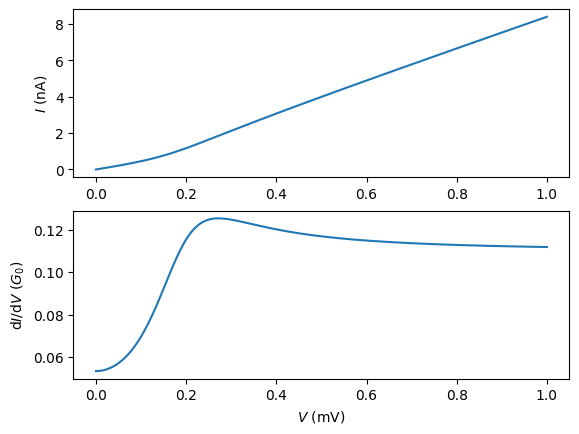

In [4]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_bcs)
ax_didv.plot(V_mV, dIdV_bcs)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

In [5]:
from theory.models.bcs_jnp import get_I_nA as get_I_nA_bcs_jnp

I_nA_bcs_jnp = get_I_nA_bcs_jnp(
    V_mV=V_mV,
    Delta_meV=np.array([0.0, Delta_meV]),
    tau=tau,
    T_K=T_K,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV_bcs_jnp = np.gradient(I_nA_bcs_jnp, V_mV) / G_0_muS

INFO:2025-11-14 17:37:41,868:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)
Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no suc

Text(0.5, 0, '$V$ (mV)')

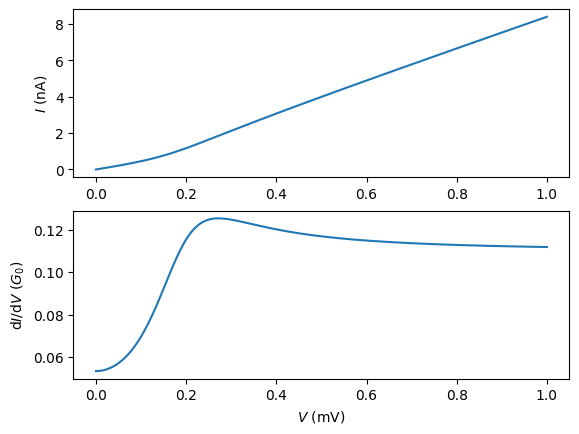

In [6]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_bcs_jnp)
ax_didv.plot(V_mV, dIdV_bcs_jnp)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

In [7]:
from theory.models.btk import get_I_nA as get_I_nA_btk

I_nA_btk = get_I_nA_btk(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)
dIdV_btk = np.gradient(I_nA_btk, V_mV, axis=0) / G_0_muS

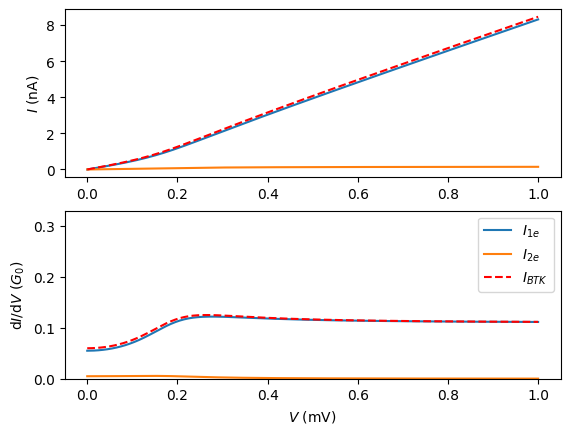

In [8]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_btk[:, 1], label="$I_{1e}$")
ax_iv.plot(V_mV, I_nA_btk[:, 2], label="$I_{2e}$")
ax_iv.plot(V_mV, I_nA_btk[:, 0], "r--", label="$I_{BTK}$")
ax_didv.plot(V_mV, dIdV_btk[:, 1], label="$I_{1e}$")
ax_didv.plot(V_mV, dIdV_btk[:, 2], label="$I_{2e}$")
ax_didv.plot(V_mV, dIdV_btk[:, 0], "r--", label="$I_{BTK}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

ax_didv.set_ylim(0, 3 * tau)
ax_didv.legend()

In [9]:
from theory.models.ha import get_I_nA as get_I_nA_ha

I_nA_ha = get_I_nA_ha(
    V_mV=V_mV,
    Delta_meV=np.array([Delta_meV, Delta_meV]),
    tau=tau,
    T_K=T_K,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV_ha = np.gradient(I_nA_ha, V_mV) / G_0_muS

Text(0.5, 0, '$V$ (mV)')

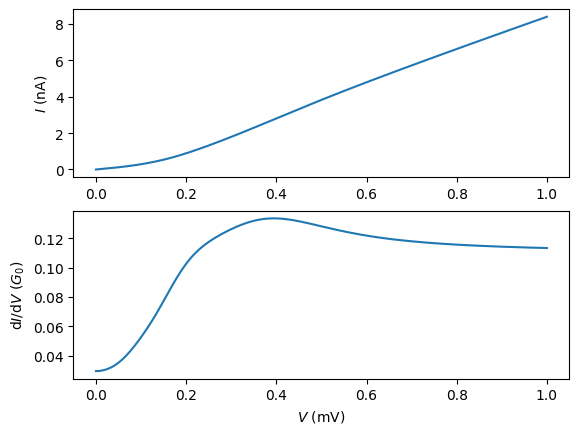

In [10]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_ha)
ax_didv.plot(V_mV, dIdV_ha)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

In [11]:
from theory.models.fcs import get_I_nA as get_I_nA_fcs

I_nA_fcs = get_I_nA_fcs(
    V_mV=V_mV,
    Delta_meV=np.array([Delta_meV, Delta_meV]),
    tau=tau,
    T_K=T_K,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV_fcs = np.gradient(I_nA_fcs, V_mV, axis=0) / G_0_muS

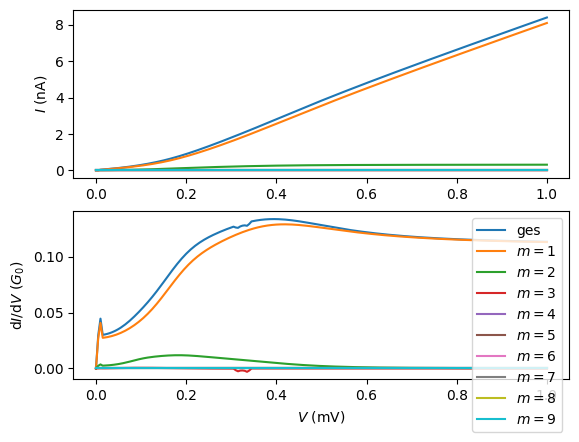

In [12]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_fcs[:, 0], label=f"ges")
ax_didv.plot(V_mV, dIdV_fcs[:, 0], label=f"ges")
for m in range(1, 10):
    ax_iv.plot(V_mV, I_nA_fcs[:, m], label=f"$m = {m}$")
    ax_didv.plot(V_mV, dIdV_fcs[:, m], label=f"$m = {m}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

ax_didv.legend()

In [13]:
from theory.models.fcs_pbar import get_I_nA as get_I_nA_fcs_pbar

I_nA_fcs_pbar = get_I_nA_fcs_pbar(
    V_mV=V_mV,
    Delta_meV=np.array([Delta_meV, Delta_meV]),
    tau=tau,
    T_K=T_K,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV_fcs_pbar = np.gradient(I_nA_fcs_pbar, V_mV, axis=0) / G_0_muS

cached values: 201/201


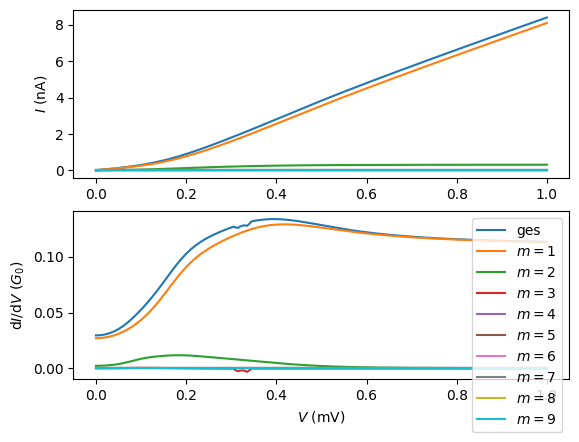

In [14]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_fcs_pbar[:, 0], label=f"ges")
ax_didv.plot(V_mV, dIdV_fcs_pbar[:, 0], label=f"ges")
for m in range(1, 10):
    ax_iv.plot(V_mV, I_nA_fcs_pbar[:, m], label=f"$m = {m}$")
    ax_didv.plot(V_mV, dIdV_fcs_pbar[:, m], label=f"$m = {m}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

ax_didv.legend()

In [ ]:
from theory.models.ns import get_I_nA as get_I_nA_ns

I_nA_NS = get_I_nA_ns(
    V_mV=V_mV,
    tau_0=tau_0,
    tau=tau,
    T_K=T_K,
    Delta_meV=Delta_meV,
    Gamma_meV=Gamma_meV,
    A_mV=A_mV,
    nu_GHz=nu_GHz,
)
dIdV_nA_NS = np.gradient(I_nA_NS, V_mV, axis=0) / G_0_muS

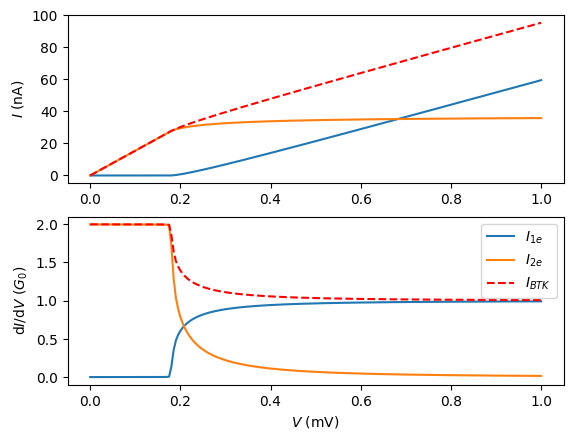

In [83]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_NS[:, 1], label="$I_{1e}$")
ax_iv.plot(V_mV, I_nA_NS[:, 2], label="$I_{2e}$")
ax_iv.plot(V_mV, I_nA_NS[:, 0], "r--", label="$I_{BTK}$")
ax_didv.plot(V_mV, dIdV_nA_NS[:, 1], label="$I_{1e}$")
ax_didv.plot(V_mV, dIdV_nA_NS[:, 2], label="$I_{2e}$")
ax_didv.plot(V_mV, dIdV_nA_NS[:, 0], "r--", label="$I_{BTK}$")
# ax_iv.plot(V_mV, I_nA_NS[:], "r--", label="$I_{BTK}$")
# ax_didv.plot(V_mV, dIdV_nA_NS[:], "r--", label="$I_{BTK}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

# ax_didv.set_ylim(0, 3 * tau)
ax_didv.legend()